In [ ]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 1s (1,038 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 39 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 49.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-droid-fallback all 1:6.0.

In [ ]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
parser = nltk.ChartParser(grammar)

sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
  print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


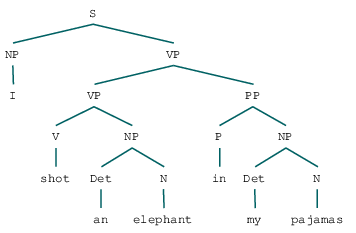

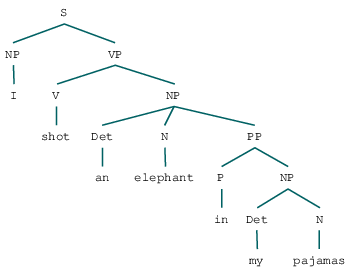

In [ ]:
for tree in parser.parse(sentence):
  display(tree)

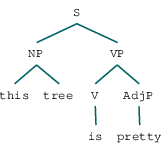

In [ ]:
from nltk.tree import Tree
from IPython.display import display
chunked_sentence = '(S (NP this tree) (VP (V is) (AdjP pretty)))'

tree = Tree.fromstring(str(chunked_sentence))
display(tree)

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = word_tokenize("And now for something completely different")
result = nltk.pos_tag(text)
result

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

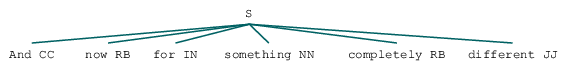

In [ ]:
nltk.ne_chunk(result)

In [ ]:
import spacy
from spacy import displacy
 
sp = spacy.load('en_core_web_sm')
sentence = sp(u"We are eating at a restaurant with our friends.")
displacy.render(sentence, style='dep', jupyter=True, options={'distance': 75})


In [ ]:
raw_text = "Madrid is the capital and most populous city of Spain. The city has almost 3.4 million inhabitants and a metropolitan area population of approximately 6.7 million. It is the second-largest city in the European Union (EU), surpassed only by Berlin in its administrative limits, and its monocentric metropolitan area is the second-largest in the EU, surpassed only by Paris. The municipality covers 604.3 km2 (233.3 sq mi) geographical area."

In [ ]:
NER = spacy.load("en_core_web_sm", disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])

text= NER(raw_text)

spacy.displacy.render(text, style="ent",jupyter=True)


In [ ]:
import spacy
import pandas as pd
nlp = spacy.load('en')
nlp.entity
GPEdoc = nlp("""Madrid is the capital of Spain. The covid pandemic started in 2019.""")

print(GPEdoc.ents[0], GPEdoc.ents[0].label_)
GPEdoc.ents


Madrid GPE


(Madrid, Spain, 2019)

In [ ]:
GPEdoc.ents

(Madrid, Spain, 2019)

In [ ]:
entities_sp = pd.DataFrame([(ent, ent.label_) for ent in GPEdoc.ents],columns=["entity","label"])
entities_sp

,entity,label
0,(Madrid),GPE
1,(Spain),GPE
2,(2019),DATE


In [ ]:
!pip install polyglot pyicu pycld2 morfessor

     |████████████████████████████████| 126 kB 5.2 MB/s 
     |████████████████████████████████| 304 kB 49.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 41.4 MB 1.4 MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52577 sha256=db23c02f57a7e4521f68644e9273b196a76ec2de8abd83d81dc357a9c8cc85ad
  Stored in directory: /root/.cache/pip/wheels/09/bc/67/75c9de8e9726460bc0b101ad225ad025cb8ce9e0759beb9d52
  Created wheel for pyicu: filename=PyICU-2.8.1-cp37-cp37m-linux_x86_64.whl size=1375817 sha256=1afb6a9b7d21ac5e82b3d8e3d431aec8a0d2394d0877c9c8492b16e5f0564a5b
  Stored in directory: /root/.cache/pip/wheels/83/60/dc/4f5dffc9027a5912759aabaf918819edacfe3caffd5d31912b
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834128 sha256=d826b80dcf807b58b2b105fb0477f0dc5d4d0958fd5d954971a6dd37b89fc130
  Sto

In [ ]:
!polyglot download embeddings2.es ner2.es

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


Polyglot

In [ ]:

from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 3))

  1. Italian                    2. Hindi                      3. French                   
  4. Spanish; Castilian         5. Vietnamese                 6. Arabic                   
  7. Bulgarian                  8. Norwegian                  9. Estonian                 
 10. Japanese                  11. Greek, Modern             12. Slovene                  
 13. Korean                    14. Serbian                   15. Finnish                  
 16. Catalan; Valencian        17. Croatian                  18. Dutch                    
 19. Swedish                   20. Tagalog                   21. Danish                   
 22. Latvian                   23. Ukrainian                 24. Romanian, Moldavian, ... 
 25. Persian                   26. Slovak                    27. Portuguese               
 28. English                   29. Malay                     30. Polish                   
 31. German                    32. Indonesian                33. Chinese                  

In [ ]:
from polyglot.text import Text

textp= Text("""Madrid está en España. 
            En febrero de 2019 empezó la pandemia""")
textp.entities


[I-LOC(['Madrid']), I-LOC(['España'])]

In [ ]:
import pandas as pd
pd.DataFrame([(ent[0],ent.tag) for ent in textp.entities],columns=["entity","label"])

,entity,label
0,Madrid,I-LOC
1,España,I-LOC


In [ ]:
for sent in textp.sentences:
  print(sent, "\n")
  for entity in sent.entities:
    print(entity.tag, entity)

Madrid está en España. 

I-LOC ['Madrid']
I-LOC ['España']
En febrero de 2019 empezó la pandemia 



# Open information extraction
https://corenlp.run/

# Text similarity

In [ ]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
# Define two 3-dimensional vectors A and B
A = (2,3,1)
B = (5,2,3)
# Compute the cosine score of A and B
score = cosine_similarity([A], [B])
# Print the cosine score
print(score)


[[0.82375447]]


In [ ]:
# Import the cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics import jaccard_score
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame(np.random.binomial(1, 0.5, size=(100, 5)), columns=list('ABCDE'))
print(jaccard_score(df['A'], df['B']))

0.24


In [ ]:
df

,A,B,C,D,E
0,1,1,1,1,0
1,1,0,1,1,0
2,1,1,1,1,0
3,0,0,1,1,1
4,1,1,0,1,0
...,...,...,...,...,...
95,1,1,1,1,0
96,0,0,0,0,0
97,1,0,1,1,1
98,0,1,1,0,1
